In [1]:
from kf import KF
import numpy as np
import matplotlib.pyplot as plt

In [7]:
plt.ion()
plt.figure()

kf = KF(x_init=0.0, v_init=1.0, sig_a=0.1)

real_x = 0
meas_variance = 0.1 ** 2
real_v = 0.8

dt = 0.1
meas = 50
steps = 1000

real_xs = []
real_vs = []

states = []
covs = []

<Figure size 640x480 with 0 Axes>

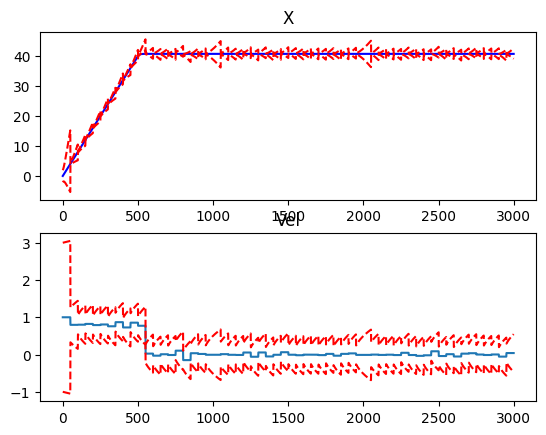

In [10]:
for step in range(steps):
    states.append(kf.state)
    covs.append(kf.cov)

    if step > steps/2:
        real_v *= 0.9

    real_x = real_x + dt * real_v

    kf.predict(dt=dt)
    if step > 0 and step % meas == 0:
        kf.update(meas_value = real_x + np.random.randn() * np.sqrt(meas_variance), meas_variance=meas_variance)

    real_xs.append(real_x)
    real_vs.append(real_v)
        

plt.subplot(2, 1, 1)
plt.title('X')
# plt.plot([state[0] for state in states], 'r')
plt.plot(real_xs, 'b')
plt.plot([state[0] - 2*np.sqrt(cov[0,0]) for state, cov in zip(states, covs)], 'r--')
plt.plot([state[0] + 2*np.sqrt(cov[0,0]) for state, cov in zip(states, covs)], 'r--')

plt.subplot(2, 1, 2)
plt.title('Vel')
plt.plot([state[1] for state in states])
# plt.plot(real_vs, 'b')
plt.plot([state[1] - 2*np.sqrt(cov[1,1]) for state, cov in zip(states, covs)], 'r--')
plt.plot([state[1] + 2*np.sqrt(cov[1,1]) for state, cov in zip(states, covs)], 'r--')

plt.show()